In [1]:
import pandas as pd;
import numpy as np;
import json;

In [2]:
rawJSON = json.loads("".join(open('keystrokes-34c38-export (7).json').readlines()))

In [3]:
def calculatePerKeyDwellTime(dataframe,DEBUG=False):
    dwell_times = {}
    for i in set(dataframe.key.unique()):
        if(DEBUG):
            print (i);
        running_average = 0;
        subset = dataframe[dataframe['key'] == i];
        if(len(dataframe[dataframe['key']==i])%2==0):
            for g in range(len(subset)-1):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            if(DEBUG):
                print ("running average: "+str(running_average));
            running_average/=len(subset);
            if(DEBUG):
                print ("running average/subset_len = "+str(running_average));
        else: # last key release not recorded
            for g in range(len(subset)-2):
                running_average+=(float(subset.iloc[g+1]['timestamp']) - float(subset.iloc[g]['timestamp']));
            running_average/=len(subset);
        dwell_times[i] = running_average;
        if(DEBUG):
            print (" ");
    return dwell_times;    


def calculateFlightTime(dataframe):
#     time between release and next key press
    flight_times = [];
    index_of_releases = ((dataframe[dataframe['action']=='RELEASED']).index.tolist());
    range_of_events = list(range(index_of_releases[0], index_of_releases[-1]));
    index_of_presses = list(set(range_of_events).difference(index_of_releases));
    first_press = index_of_presses[0];
    while (index_of_presses[0]<index_of_releases[0]):
        del index_of_releases[0];
    while(len(index_of_presses)>0):
        flight_times.append((float(dataframe['timestamp'].iloc[index_of_presses[0]]) - float(dataframe['timestamp'].iloc[index_of_releases[0]])));
        del index_of_releases[0]
        del index_of_presses[0]
    return flight_times;

In [4]:
keystrokes=pd.DataFrame.from_dict(rawJSON)
obj = (keystrokes[:1]['samples'])
keystrokes=pd.DataFrame.from_dict(rawJSON['samples']).T

In [5]:
# Just the new records
lorem_ipsum = keystrokes.iloc[22:]

In [6]:
lorem_ipsum

,keystrokes,subject
-KXcfQLt3sL8sFQLSA25,"[[""1480298596527 Shift PRESSED"",""1480298597351...",An Dee
-KXchppS19K4bkiMZIho,"[[""1480299235028 Shift PRESSED"",""1480299235217...",Joseph Haaga


In [7]:
#  .o88o. 8888o. 8888o. 88  88 
#  88  88 88  88 88  88 88  88 
#  888888 88  88 88  88 'Y8888 
#  88  88 88  88 88  88     88 
#  88  88 88  88 8888Y' 8888Y' 

subject_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[0])[0]
len(subject_lorem_keystrokes)
# There are 1456 keystroke events. We will divide these into groups of 16, giving us 91 records
split_keystrokes = [subject_lorem_keystrokes[x:x+15] for x in range(0, len(subject_lorem_keystrokes),16)]

dwell_time_descriptive_stats = [];
for n in split_keystrokes:
    split_list=[];
    raw = pd.DataFrame(n);
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action']);
    dwell_time_descriptive_stats.append((pd.Series(list(calculatePerKeyDwellTime(split).values())).describe()[1:]));

andy = pd.DataFrame(dwell_time_descriptive_stats);
andy['subject'] = 'Andy';

andy.plot()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


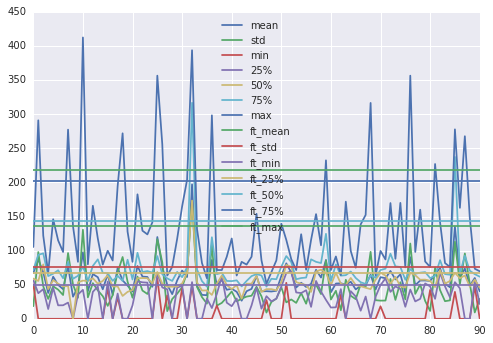

In [93]:
#      88 .o88o. 888888 
#      88 88  88 88     
#      88 88  88 8888   
#  88  88 88  88 88     
#  'Y88Y' 'Y88Y' 888888 

subject_lorem_keystrokes = json.loads(lorem_ipsum['keystrokes'].iloc[1])[0]
len(subject_lorem_keystrokes)
# There are 1456 keystroke events. We will divide these into groups of 16, giving us 91 records
split_keystrokes = [subject_lorem_keystrokes[x:x+15] for x in range(0, len(subject_lorem_keystrokes),16)]

dwell_time_descriptive_stats = [];
flight_times = [];
for n in split_keystrokes:
    split_list=[];
    raw = pd.DataFrame(n);
    for n in raw.index:
        split_list.append(raw[0][n].split(" "));
    split = pd.DataFrame(split_list,columns=['timestamp','key','action']);
    dwell_time_descriptive_stats.append((pd.Series(list(calculatePerKeyDwellTime(split).values())).describe()[1:]));
    flight_times.append(calculateFlightTime(split));
    
joe = pd.DataFrame(dwell_time_descriptive_stats);
joe['subject'] = 'Joe';
joe['flight time'] = flight_times
ft_descriptive_stats = list(pd.Series(joe['flight time'][0]).describe())[1:]
joe['ft_mean'] = ft_descriptive_stats[0];
joe['ft_std'] = ft_descriptive_stats[1];
joe['ft_min'] = ft_descriptive_stats[2];
joe['ft_25%'] = ft_descriptive_stats[3];
joe['ft_50%'] = ft_descriptive_stats[4];
joe['ft_75%'] = ft_descriptive_stats[5];
joe['ft_max'] = ft_descriptive_stats[6];
joe.plot()

In [ ]:
joe

In [80]:
pd.Series(joe['flight time'][0]).describe()


count      6.000000
mean     136.166667
std       76.661377
min       49.000000
25%       67.000000
50%      144.000000
75%      201.500000
max      218.000000
dtype: float64

In [38]:
# combine Joe & Andy
master = joe.append(andy);
master = master.reset_index();
answers = master['subject'];
X = master.drop('subject',axis=1);
# X

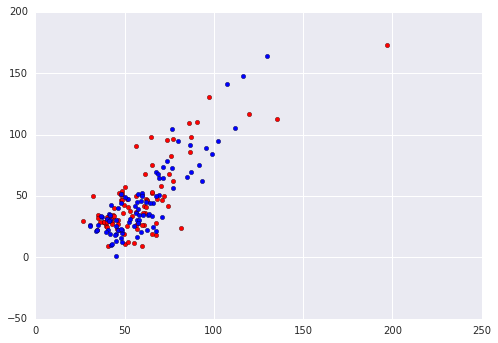

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# x = master['75%']
# y = master['25%']
colors = ['red','blue']
plt.scatter(joe['mean'], joe['std'], c='red')
plt.scatter(andy['mean'], andy['std'],c='blue')

In [60]:
joe.columns

Index(['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'subject'], dtype='object')

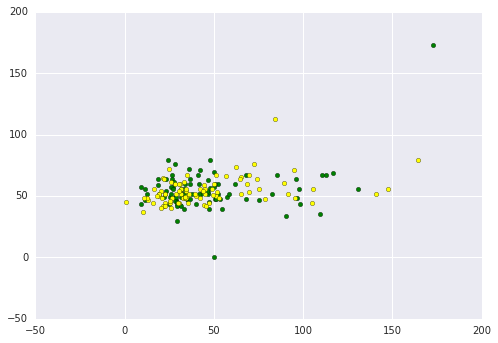

In [64]:
colors = ['red','blue']
plt.scatter(joe['std'], joe['50%'], c='green')
plt.scatter(andy['std'], andy['50%'], c='yellow')

In [50]:
joe

,mean,std,min,25%,50%,75%,max,subject
0,67.333333,18.579409,50.500000,56.500000,59.000000,71.750000,105.333333,Joe
1,87.000000,97.914078,0.000000,37.500000,55.500000,93.750000,291.000000,Joe
2,68.250000,47.597269,0.000000,43.500000,79.750000,96.000000,122.000000,Joe
3,37.845238,29.176920,0.000000,14.333333,43.500000,62.625000,67.500000,Joe
4,61.750000,47.712420,0.000000,45.500000,56.750000,66.125000,146.000000,Joe
5,49.750000,42.741715,0.000000,19.750000,51.500000,71.125000,115.000000,Joe
6,43.452381,34.874605,0.000000,19.833333,47.500000,59.500000,98.000000,Joe
7,77.119048,96.466830,0.000000,23.750000,48.000000,83.500000,277.333333,Joe
8,32.406250,50.328907,0.000000,0.000000,0.000000,58.625000,135.750000,Joe
9,46.291667,30.821523,0.000000,35.625000,53.500000,63.083333,83.500000,Joe


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, answers, test_size=0.33, random_state=42)

In [37]:
from sklearn.svm import SVC
clf1 = SVC(C=1.0, verbose=True, probability=True, decision_function_shape='ovr')
clf1.fit(X_train, y_train) 
clf1.predict_proba(X_test)

[LibSVM]

array([[ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864627,  0.51135373],
       [ 0.48883924,  0.51116076],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864615,  0.51135385],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,  0.51135378],
       [ 0.48864622,

In [22]:
print(y_test)

19      Joe
45      Joe
140    Andy
30      Joe
67      Joe
16      Joe
119    Andy
174    Andy
109    Andy
141    Andy
24      Joe
150    Andy
41      Joe
118    Andy
15      Joe
111    Andy
113    Andy
82      Joe
9       Joe
114    Andy
18      Joe
66      Joe
60      Joe
169    Andy
171    Andy
164    Andy
117    Andy
65      Joe
90      Joe
55      Joe
29      Joe
128    Andy
145    Andy
31      Joe
12      Joe
42      Joe
158    Andy
137    Andy
98     Andy
159    Andy
38      Joe
108    Andy
85      Joe
68      Joe
143    Andy
2       Joe
100    Andy
122    Andy
154    Andy
51      Joe
76      Joe
56      Joe
26      Joe
153    Andy
138    Andy
104    Andy
78      Joe
36      Joe
93     Andy
Name: subject, dtype: object


In [11]:
# analyze single subject
current_subject = lorem_ipsum[:1];
print ("Analyzing "+current_subject['subject']);
recording = current_subject['keystrokes'][0];
list_of_recordings = json.loads(recording)
list_of_recordings[2]
split_list = []

# into DataFrame
raw = pd.DataFrame(list_of_recordings[0])
for n in raw.index:
    split_list.append(raw[0][n].split(" "));
split = pd.DataFrame(split_list,columns=['timestamp','key','action'])

dts = calculatePerKeyDwellTime(split);
# Dwell Times: mean, std, min, 25%, 50%, 75%, max
dts_series = pd.Series(list(dts.values()))
# list(dts_series.describe())[1:]

-KXcfQLt3sL8sFQLSA25    Analyzing An Dee
Name: subject, dtype: object


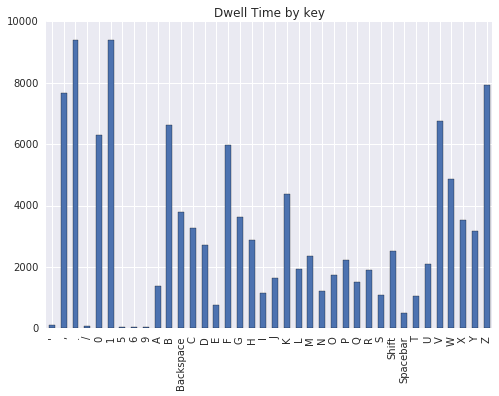

In [12]:
import matplotlib
%matplotlib inline
import seaborn;
pd.Series(dts).plot(kind='bar', title='Dwell Time by key', y='time (ms)')


In [13]:
a = calculateFlightTime(split);

In [14]:
# pd.Series(a).plot(title='Flight Time over time')

In [15]:
# model_data = {};
# indexNumber = 0;
# for j in range(len(keystrokes)):
#     print ("performing "+j);
#     recording = keystrokes['keystrokes'].iloc[j];
#     list_of_recordings = json.loads(recording)
#     for k in list_of_recordings:
#         for n in raw.index:
#             split_list.append(raw[0][n].split(" "));
#         temp = pd.DataFrame(split_list,columns=['timestamp','key','action'])
#         dts = calculatePerKeyDwellTime(temp);
#         dts['subject'] = keystrokes['subject'].iloc[j];
#         model_data[indexNumber]=dts;
#         indexNumber+=1;
